In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv(r'D:\Works\TensorFlowLearn\Tensorflow课程—分章节代码和课件\19.第十九章  RNN序列预测实例 - 空气污染预测\北京空气_2010.1.1-2014.12.31.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [9]:
data[data['pm2.5'].isna()]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43548,43549,2014,12,20,12,NaN,-18,0.0,1030.0,NW,244.97,0,0
43549,43550,2014,12,20,13,NaN,-19,1.0,1029.0,NW,249.89,0,0
43550,43551,2014,12,20,14,NaN,-20,1.0,1029.0,NW,257.04,0,0
43551,43552,2014,12,20,15,NaN,-20,2.0,1028.0,NW,262.85,0,0


In [10]:
data = data.iloc[24:].copy()

In [54]:
data.fillna(method='ffill', inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43800 non-null  int64  
 1   year    43800 non-null  int64  
 2   month   43800 non-null  int64  
 3   day     43800 non-null  int64  
 4   hour    43800 non-null  int64  
 5   pm2.5   43800 non-null  float64
 6   DEWP    43800 non-null  int64  
 7   TEMP    43800 non-null  float64
 8   PRES    43800 non-null  float64
 9   cbwd    43800 non-null  object 
 10  Iws     43800 non-null  float64
 11  Is      43800 non-null  int64  
 12  Ir      43800 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [13]:
data.drop('No', axis=1, inplace=True)

In [14]:
import datetime

In [15]:
data['time'] = data.apply(lambda x: datetime.datetime(year=x['year'],
                                       month=x['month'],
                                       day=x['day'], 
                                       hour=x['hour']), 
                          axis=1)

In [16]:
data.set_index('time', inplace=True)

In [17]:
data.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [18]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [19]:
data.columns = ['pm2.5', 'dew', 'temp', 'press', 'cbwd', 'iws', 'snow', 'rain']

In [20]:
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [21]:
data = data.join(pd.get_dummies(data.cbwd))

In [22]:
del data['cbwd']

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm2.5   43800 non-null  float64
 1   dew     43800 non-null  int64  
 2   temp    43800 non-null  float64
 3   press   43800 non-null  float64
 4   iws     43800 non-null  float64
 5   snow    43800 non-null  int64  
 6   rain    43800 non-null  int64  
 7   NE      43800 non-null  uint8  
 8   NW      43800 non-null  uint8  
 9   SE      43800 non-null  uint8  
 10  cv      43800 non-null  uint8  
dtypes: float64(4), int64(3), uint8(4)
memory usage: 3.8 MB


<AxesSubplot:xlabel='time'>

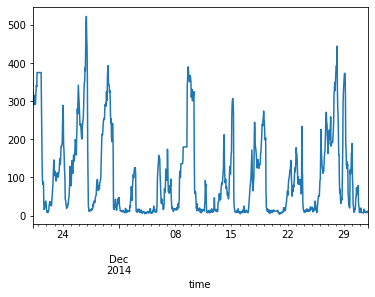

In [24]:
data['pm2.5'][-1000:].plot()

<AxesSubplot:xlabel='time'>

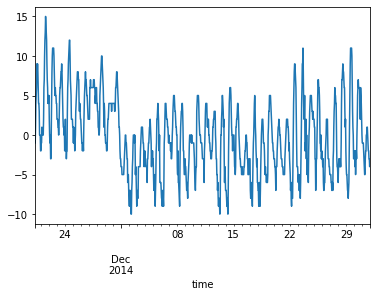

In [25]:
data['temp'][-1000:].plot()

In [26]:
data.head(3)

,pm2.5,dew,temp,press,iws,snow,rain,NE,NW,SE,cv
time,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0


In [27]:
sequence_length = 5*24
delay = 24

In [28]:
data_ = []
for i in range(len(data) - sequence_length - delay):
    data_.append(data.iloc[i: i + sequence_length + delay])

In [29]:
data_ = np.array([df.values for df in data_])

In [30]:
data_.shape

(43656, 144, 11)

In [31]:
np.random.shuffle(data_)

In [32]:
x = data_[:, :-delay, :]
y = data_[:, -1, 0]

In [33]:
split_boundary = int(data_.shape[0] * 0.8)

In [34]:
train_x = x[: split_boundary]
test_x = x[split_boundary:]

train_y = y[: split_boundary]
test_y = y[split_boundary:]

In [35]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((34924, 120, 11), (8732, 120, 11), (34924,), (8732,))

In [36]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

In [37]:
mean.shape

(120, 11)

In [38]:
train_x = (train_x - mean)/std

In [39]:
test_x = (test_x - mean)/std

In [40]:
batch_size = 128

In [41]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [42]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=50,
                    validation_data=(test_x, test_y)
                    )

Epoch 1/50
273/273 [==============================] - 1s 1ms/step - loss: 71.8016 - val_loss: 67.0056
Epoch 2/50
273/273 [==============================] - 0s 813us/step - loss: 63.3650 - val_loss: 61.6072
Epoch 3/50
273/273 [==============================] - 0s 855us/step - loss: 59.6321 - val_loss: 59.9193

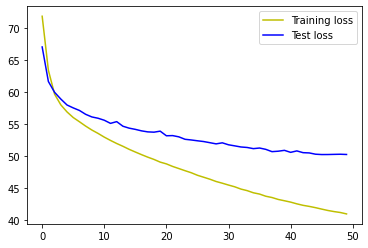

In [43]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

In [44]:
model = keras.Sequential()
model.add(layers.LSTM(32, input_shape=(train_x.shape[1:])))
model.add(layers.Dense(1))

In [45]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')

In [46]:
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=200,
                    validation_data=(test_x, test_y))

Epoch 1/200
273/273 [==============================] - 10s 34ms/step - loss: 88.0185 - val_loss: 82.5539

KeyboardInterrupt: 

In [ ]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(32, input_shape=(train_x.shape[1:]), return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [47]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')

In [48]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

In [51]:
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=200,
                    validation_data=(test_x, test_y),
                    callbacks=[learning_rate_reduction])

Epoch 1/200
273/273 [==============================] - 9s 31ms/step - loss: 61.4386 - val_loss: 61.4658

KeyboardInterrupt: 

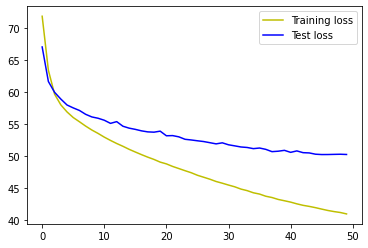

In [53]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

